# Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../discrete_mixflows/')
from discrete_mixflows import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 24})

## 1D model

In [2]:
M=10
logZ1=np.log(2*np.cosh(1)) # same for any value of x_2 and x_(M-1)
logZ2=np.log(4*np.cosh(1)) # same for any value of x_m, m!=2,M-1
def lp(x,axis=None):
    # compute the univariate log joint and conditional target pmfs of the ising model
    #
    # inputs:
    #    x    : (M,d) array with state values
    #    axis : int, variable to condition on; returns joint if None
    # outputs:
    #   ext_lprb : if axis is None, (d,) array with log joint; else, (d,2) array with d conditionals 
    
    if axis==None: 
        tmp_x=np.vstack((np.zeros((1,x.shape[1])),np.copy(x))) # add row with 1's at start of x
        lag_x=np.vstack((np.copy(x),np.zeros((1,x.shape[1])))) # add row with 0's at end of x
        return np.sum(tmp_x*lag_x,axis=0)
    if axis==0: return np.vstack((-x[1,:],x[1,:])).T-logZ1
    if axis==M-1: return np.vstack((-x[-2,:],x[-2,:])).T-logZ1
    if axis>=M: raise Exception("Axis out of bounds")
    return np.log(np.vstack((np.exp(-x[axis-1,:])+np.exp(-x[axis+1,:]),\
                             np.exp(x[axis-1,:])+np.exp(x[axis+1,:])))).T-logZ2

In [3]:
lq0 = lambda x,u : np.log(1/M)*np.ones(x.shape[1])
def randq0(size): 
    tmpx=np.random.randint(low=0,high=2,size=(M,size))
    tmpx[tmpx==0]=-1
    return tmpx,np.random.rand(M,size)

In [4]:
xsamples,usamples=randqN(1000,N=10,lp=lp,randq0=randq0,xi=np.pi/16)

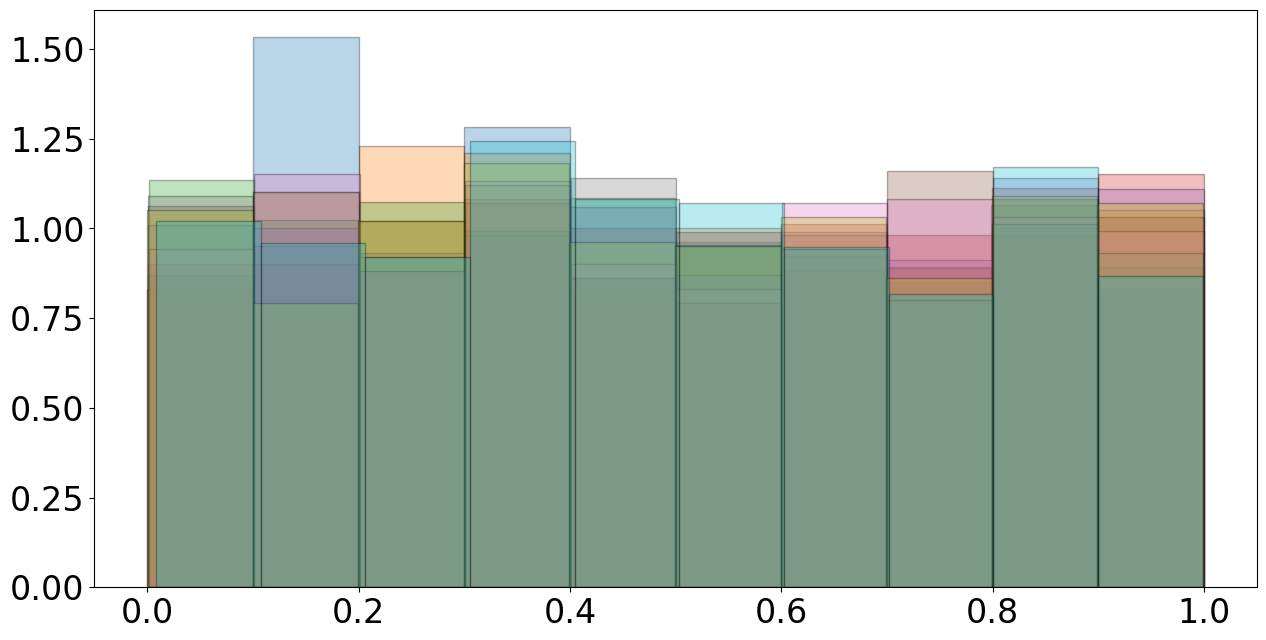

In [6]:
for m in range(usamples.shape[0]): plt.hist(usamples[m,:],density=True,alpha=0.3,ec='black',bins=10)